## Imports

In [ ]:
from torch.utils.data import Dataset
import scipy.io as sio
import numpy as np
import torch
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import pandas as pd
import tarfile


## Dataset: Flower102

### Read and Examine Data (2 points)

**Label Reference** 📕: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/categories.html

In [ ]:
# DONT MODIFY THIS CODE CELL
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xvzf /content/102flowers.tgz
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

Streaming output truncated to the last 5000 lines.
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image_07640.jpg
jpg/image_04883.jpg
jpg/image_06145.jpg
jpg/image_07742.jpg
jpg/image_00604.jpg
jpg/image_00743.jpg
jpg/image_01920.jpg
jpg/image_00104.jpg
jpg/image_01503.jpg
jpg/image_02910.jpg
jpg/image_01407.jpg
jpg/image_06754.jpg
jpg/image_07184.jpg
jpg/image_06889.jpg
jpg/image_05796.jpg
jpg/image_05724.jpg
jpg/image

In [ ]:
# DONT MODIFY THIS CODE CELL
labels = sio.loadmat('imagelabels.mat')['labels']

### Custom Dataset (4 points)

In [ ]:
# import OS module
import os

# This is my path
path = "/content/jpg"

# to store files in a list
imgs_name = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if '.jpg' in f:
			imgs_name.append(f)


In [ ]:
imgs_name.sort()

In [ ]:
df = pd.DataFrame()
df['labels'] =labels[0]
df['name'] =imgs_name

df.to_csv('labels.csv')

In [ ]:
df = pd.read_csv('labels.csv', header=None)
df.rename(columns={2: 'name', 1: 'labels'}, inplace=True)
df.to_csv('labels.csv', index=False)
df

,0,labels,name
0,NaN,labels,name
1,0.0,77,image_00001.jpg
2,1.0,77,image_00002.jpg
3,2.0,77,image_00003.jpg
4,3.0,77,image_00004.jpg
...,...,...,...
8185,8184.0,62,image_08185.jpg
8186,8185.0,62,image_08186.jpg
8187,8186.0,62,image_08187.jpg
8188,8187.0,62,image_08188.jpg


In [ ]:
df.drop(index=df.index[0], axis=0, inplace=True)


In [ ]:
df.to_csv('labels.csv', index=False)
df

,0,labels,name
1,0.0,77,image_00001.jpg
2,1.0,77,image_00002.jpg
3,2.0,77,image_00003.jpg
4,3.0,77,image_00004.jpg
5,4.0,77,image_00005.jpg
...,...,...,...
8185,8184.0,62,image_08185.jpg
8186,8185.0,62,image_08186.jpg
8187,8186.0,62,image_08187.jpg
8188,8187.0,62,image_08188.jpg


In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
])

In [ ]:
create_tensor = transforms.ToTensor()

class MyCustomDataset(Dataset):
  def __init__(self, labels_file_path, base_path, transform = None):
    self.labels_file = pd.read_csv(labels_file_path)
    self.base_path = base_path
    self.transform = transform

  def __len__(self):
    return len(self.labels_file)

  def __getitem__(self, idx):
    image_name = self.labels_file["name"].iloc[idx]
    label = self.labels_file["labels"].iloc[idx]

    im = Image.open(f"{self.base_path}/{image_name}").convert("L")
    im = np.array(im)

    # im = im/255.0
    im = create_tensor(im)

    if self.transform:
      im = self.transform(im)

    # return {"Data": im, "Label":label}
    return im, label

In [ ]:
import os
filename = os.listdir("/content/jpg")
print(filename)

['image_02862.jpg', 'image_05976.jpg', 'image_02503.jpg', 'image_04719.jpg', 'image_00680.jpg', 'image_04644.jpg', 'image_03178.jpg', 'image_07626.jpg', 'image_02673.jpg', 'image_08090.jpg', 'image_07111.jpg', 'image_01710.jpg', 'image_03932.jpg', 'image_02566.jpg', 'image_00180.jpg', 'image_03796.jpg', 'image_02811.jpg', 'image_05345.jpg', 'image_02902.jpg', 'image_07277.jpg', 'image_03569.jpg', 'image_00031.jpg', 'image_05851.jpg', 'image_04271.jpg', 'image_00726.jpg', 'image_03720.jpg', 'image_07037.jpg', 'image_08146.jpg', 'image_06264.jpg', 'image_03948.jpg', 'image_04301.jpg', 'image_01192.jpg', 'image_02569.jpg', 'image_01133.jpg', 'image_00618.jpg', 'image_03484.jpg', 'image_05595.jpg', 'image_02185.jpg', 'image_05283.jpg', 'image_00751.jpg', 'image_04327.jpg', 'image_03003.jpg', 'image_02580.jpg', 'image_04470.jpg', 'image_05823.jpg', 'image_03683.jpg', 'image_02314.jpg', 'image_04491.jpg', 'image_07795.jpg', 'image_04606.jpg', 'image_00782.jpg', 'image_03708.jpg', 'image_0548

In [ ]:
train_dataset = MyCustomDataset("labels.csv", "/content/jpg", transform = transform )

test_dataset = MyCustomDataset("labels.csv", "/content/jpg" , transform = transform )

In [ ]:
train_loader = DataLoader(train_dataset, batch_size= 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= 32, shuffle=True)

In [ ]:
df_sz = len(df)

train_labels = df[:int(0.8*df_sz)]
test_labels = df[int(0.8*df_sz):]

## CNN Model (4 points)

**Start Coding Here...** 👨‍💻👩‍💻

In [ ]:
# CNN model

# structure = conv2 layer, max pool, conv2 layer, max pool, linear layer, linear layer
class CNN(nn.Module):
  def __init__(self, input, output):
    super().__init__()

    # parameters = input channel num, output channel num, filter size, stride size, padding size
    self.conv1 = nn.Conv2d(input,20,3,1,1) # 2d since we're dealing with pics
    self.conv2 = nn.Conv2d(20,50,3,1,1)
    self.linear1 = nn.Linear(50 * 7 * 7 , 100) # from forward passing
    self.linear2 = nn.Linear(100,output) # we only have 10 numbers -> 10 classes

  def forward(self, x):
    # feature extractor part
    # x = (1,28,28)
    x = self.conv1(x)
    x = torch.relu(x)

    # x = (20,28,28) - > conv layer only chaneged the num of channels here
    x = F.max_pool2d(x, (2,2)) # 2,2 size of the max pool filter

    # x = (20,14,14)
    x = self.conv2(x)
    x = torch.relu(x)

    # x = (50,14,14)
    x = F.max_pool2d(x, (2,2))

    # x = (50,7,7)
    #flatten it before sending it to the linear layers
    x = x.view(-1, 50* 7 * 7)
    x = self.linear1(x)
    x = torch.relu(x)
    x = self.linear2(x)

    # x = torch.softmax(x)  we dont add softmax because it is used in cross entropy loss
    return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


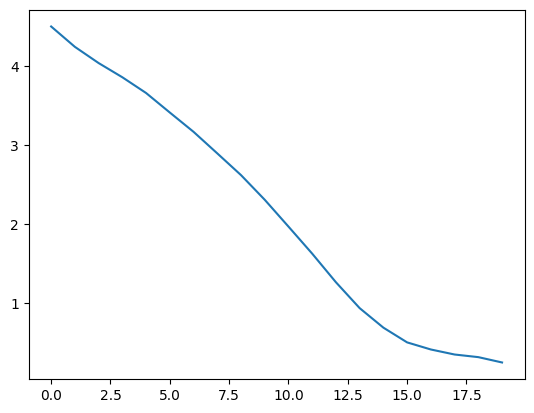

In [ ]:
# CNN model
model2 = CNN(1, 103)

num_epochs = 20
lr = 0.1
momentum = 0.5

opt = optim.SGD(model2.parameters(), lr = lr, momentum = momentum) # define optimizer

ls = []
for i in range(num_epochs):
  total_loss = 0
  for batch in train_loader:
    X,y = batch[0], batch[1]

    # forward pass
  #  print(X.shape)
    yhat = model2(X)

    # calculate loss
    loss = F.cross_entropy(yhat, y)

    # backward passing
    opt.zero_grad()
    loss.backward()
    opt.step()

    total_loss += loss.item()

  ls.append(total_loss/len(train_loader))

plt.plot(ls)

In [ ]:
#Accuracy


# Accuracy function for NN
def accuracy(model, train_loader):

  # all techniques used for training (e.g. dropouts, batch normalization) will be freezed during eval mode
  model.eval()
  model = model.to(device)

  # no_grad() disables gradient calculations to reduce memory consumptions (basically makes it faster)
  with torch.no_grad():
    correct  = 0
    total = 0
    for X, y in test_loader:
      X, y = X.to(device), y.to(device)

      output = model(X)
      loss = F.cross_entropy(output, y)
      pred = torch.argmax(output, dim = 1)
      correct += sum(pred == y)
      total += len(y)

  print(f"The accuracy is {correct.item()/total * 100 :.2f}% \n")

In [ ]:
accuracy(model2, test_loader) # CNN acc

The accuracy is 93.17% 

